In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = read_csv('TSLA.csv')

In [3]:
df = df.iloc[:,[1,4]]

In [4]:
df

,open,close
0,118.031998,130.190002
1,139.794006,141.977997
2,148.399994,145.966003
3,143.388000,149.042007
4,154.455994,150.778000
...,...,...
246,707.710022,691.049988
247,690.299988,691.619995
248,687.000000,670.969971
249,677.380005,683.799988


In [5]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
d = create_dataset(df['close'].values)

In [7]:
a,b = d

In [8]:
a[:5]

array([[130.190002],
       [141.977997],
       [145.966003],
       [149.042007],
       [150.778   ]])

In [9]:
b[:5]

array([141.977997, 145.966003, 149.042007, 150.778   , 149.272003])

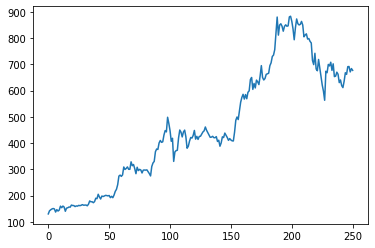

In [10]:
plt.plot(df['close'])

In [11]:
numpy.random.seed(7)

In [12]:
dataset = df['close'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [14]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [54]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [55]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [56]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (1, look_back)))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50, return_sequences = True))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/100
166/166 - 2s - loss: 0.0653
Epoch 2/100
166/166 - 0s - loss: 0.0283
Epoch 3/100
166/166 - 0s - loss: 0.0208
Epoch 4/100
166/166 - 0s - loss: 0.0168
Epoch 5/100
166/166 - 0s - loss: 0.0125
Epoch 6/100
166/166 - 0s - loss: 0.0082
Epoch 7/100
166/166 - 0s - loss: 0.0045
Epoch 8/100
166/166 - 0s - loss: 0.0021
Epoch 9/100
166/166 - 0s - loss: 0.0010
Epoch 10/100
166/166 - 0s - loss: 6.5804e-04
Epoch 11/100
166/166 - 0s - loss: 5.7425e-04
Epoch 12/100
166/166 - 0s - loss: 5.5744e-04
Epoch 13/100
166/166 - 0s - loss: 5.5760e-04
Epoch 14/100
166/166 - 0s - loss: 5.5178e-04
Epoch 15/100
166/166 - 0s - loss: 5.7345e-04
Epoch 16/100
166/166 - 0s - loss: 5.5496e-04
Epoch 17/100
166/166 - 0s - loss: 5.4890e-04
Epoch 18/100
166/166 - 0s - loss: 5.6331e-04
Epoch 19/100
166/166 - 0s - loss: 5.6484e-04
Epoch 20/100
166/166 - 0s - loss: 5.5264e-04
Epoch 21/100
166/166 - 0s - loss: 5.6070e-04
Epoch 22/100
166/166 - 0s - loss: 5.5521e-04
Epoch 23/100
166/166 - 0s - loss: 5.3915e-04
Epoch 24/1

In [57]:
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [58]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [78]:
testX[-1].reshape(1,1,1)

array([[[0.7182627]]], dtype=float32)

In [85]:
first = model.predict(testX[-1].reshape(1,1,1)).reshape(1,1,1)

In [95]:
preds = [first]
for i in range(25):
    p = model.predict(preds[-1])
    preds.append(p.reshape(1,1,1))

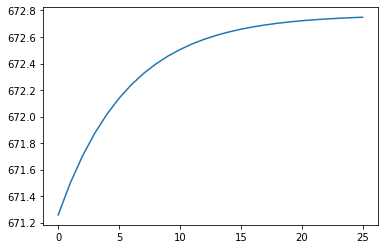

In [96]:
scaler.inverse_transform(numpy.array(preds).flatten().reshape(-1,1)))

In [59]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [60]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 19.20 RMSE
Test Score: 36.52 RMSE


In [61]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [62]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

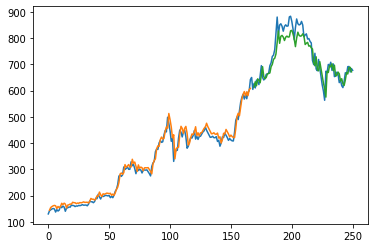

In [63]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()